In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/Gel_Project_Image_Classification

/content/drive/MyDrive/Gel_Project_Image_Classification


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Various visualizations to compare the performance of the 24 models:


# 1- Bar chart of the model accuracies, precisions, recalls, and ROC AUCs


##Bar chart of the model accuracies

<ipython-input-11-5274b92bad89>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('RdPu', 25)


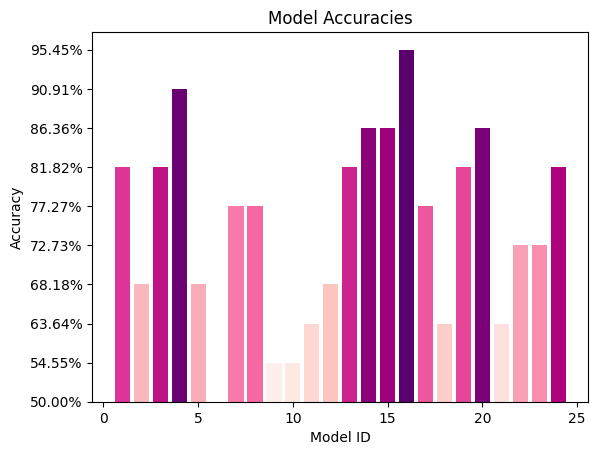

In [ ]:
# Read the CSV file into a DataFrame
results_df = pd.read_csv('results.csv')

# Sort the DataFrame by accuracy in ascending order
results_df = results_df.sort_values('accuracy')

# Extract relevant columns
model_ids = results_df['model_id']
accuracies = results_df['accuracy']
precisions = results_df['precision']
recalls = results_df['recall']
conf_mats = results_df['conf_mat']
roc_aucs = results_df['roc_auc']

# Define a colormap
colormap = plt.cm.get_cmap('RdPu', 25)

# Create the bar chart with colored bars
plt.bar(model_ids, accuracies, color=colormap(np.arange(len(accuracies))))

# Plot accuracies
plt.xlabel('Model ID')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')

# Display the chart
plt.show()

## Bar chart of the model precisions

<ipython-input-36-c3780a49c455>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('YlGnBu', 30)


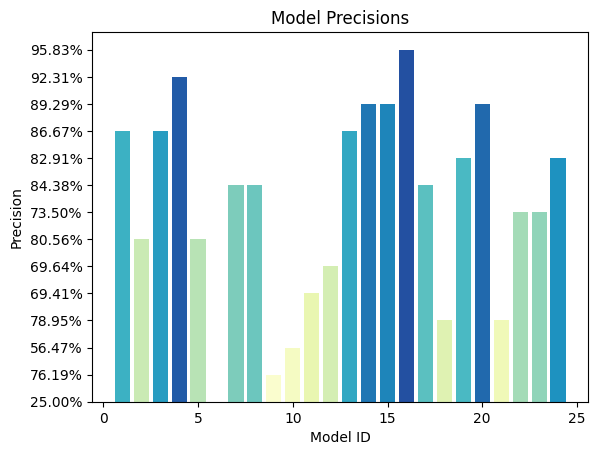

In [36]:
# Define a colormap
colormap = plt.cm.get_cmap('YlGnBu', 30)

# Plot precisions
plt.bar(model_ids, precisions, color=colormap(np.arange(len(precisions))))
plt.xlabel('Model ID')
plt.ylabel('Precision')
plt.title('Model Precisions')

# Display the chart
plt.show()

## Bar chart of the model recalls

<ipython-input-42-ec59caabb3e5>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('BuPu', 30)


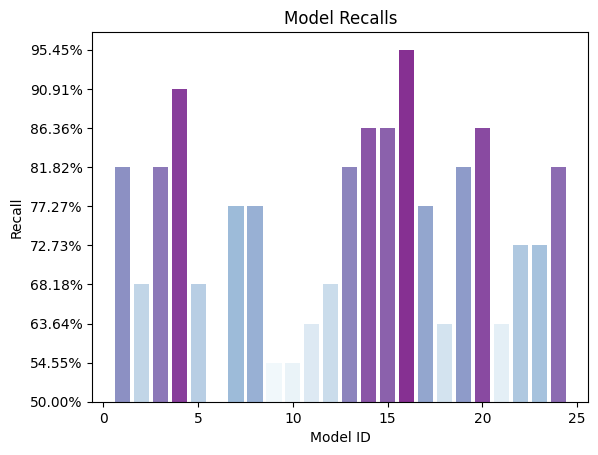

In [42]:
# Define a colormap
colormap = plt.cm.get_cmap('BuPu', 30)

# Plot recalls
plt.bar(model_ids, recalls, color=colormap(np.arange(len(recalls))))
plt.xlabel('Model ID')
plt.ylabel('Recall')
plt.title('Model Recalls')

# Display the chart
plt.show()

## Bar chart of the model ROC AUCs

<ipython-input-38-9d72afbc790d>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('YlOrRd', 25)


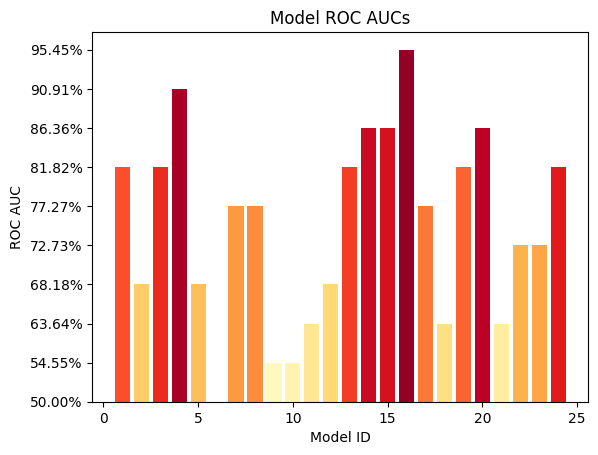

In [38]:
# Define a colormap
colormap = plt.cm.get_cmap('YlOrRd', 25)

# Plot ROC AUCs
plt.bar(model_ids, roc_aucs, color=colormap(np.arange(len(roc_aucs))))
plt.xlabel('Model ID')
plt.ylabel('ROC AUC')
plt.title('Model ROC AUCs')

# Display the chart
plt.show()

# 2- Heatmap of each model's performance across the different metrics

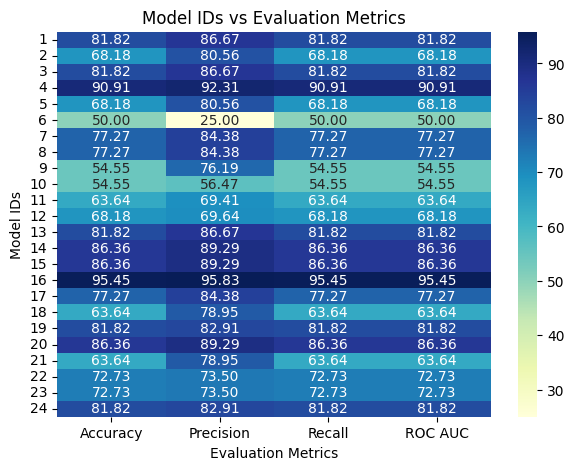

In [54]:
# Read the CSV file into a DataFrame
results_df = pd.read_csv('results.csv')

# Sort the DataFrame by model_ids
results_df = results_df.sort_values('model_id')

# Extract columns
model_ids = results_df['model_id']
accuracies = results_df['accuracy'].str.rstrip('%').astype(float)
precisions = results_df['precision'].str.rstrip('%').astype(float)
recalls = results_df['recall'].str.rstrip('%').astype(float)
roc_aucs = results_df['roc_auc'].str.rstrip('%').astype(float)
hardware_types = results_df['hardware_type']

# Convert the hardware_types column to a categorical variable
hardware_types = pd.Categorical(hardware_types)

# Create a new DataFrame with the numeric columns
numeric_data = pd.DataFrame({'Accuracy': accuracies, 'Precision': precisions, 'Recall': recalls, 'ROC AUC': roc_aucs})

# Create the heatmap
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(numeric_data, annot=True, fmt='.2f', cmap='YlGnBu')

# Modify the y-axis tick labels
heatmap.set_yticklabels(range(1, len(model_ids) + 1), rotation=0)

plt.xlabel('Evaluation Metrics')
plt.ylabel('Model IDs')
plt.title('Model IDs vs Evaluation Metrics')
plt.show()

# 3- Scatter plots of the model accuracies vs different parameters

## Scatter plots of the model accuracies vs model architectures

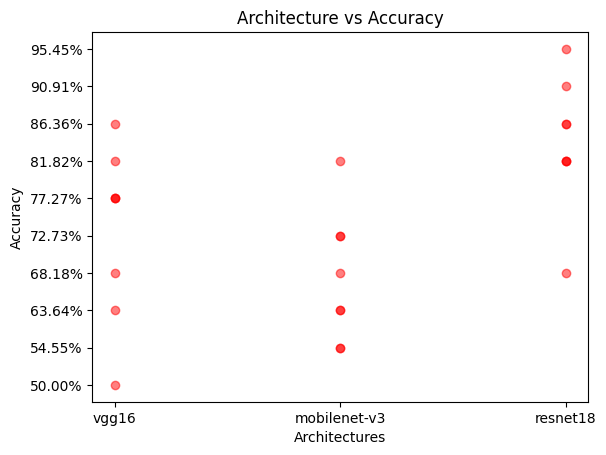

In [ ]:
# Read the CSV file into a DataFrame
results_df = pd.read_csv('results.csv')

# Sort the DataFrame by accuracy in ascending order
results_df = results_df.sort_values('accuracy')

# Extract relevant columns
architectures = results_df['pretrained_model']
hardware_types = results_df['hardware_type']
classifier_heads = results_df['classifier_head']
opt_algs = results_df['opt_alg']
accuracies = results_df['accuracy']

plt.scatter(architectures, accuracies, c='red', alpha=0.5)
plt.xlabel('Architectures')
plt.ylabel('Accuracy')
plt.title('Architecture vs Accuracy')
plt.show()

## Scatter plots of the model accuracies vs hardware types

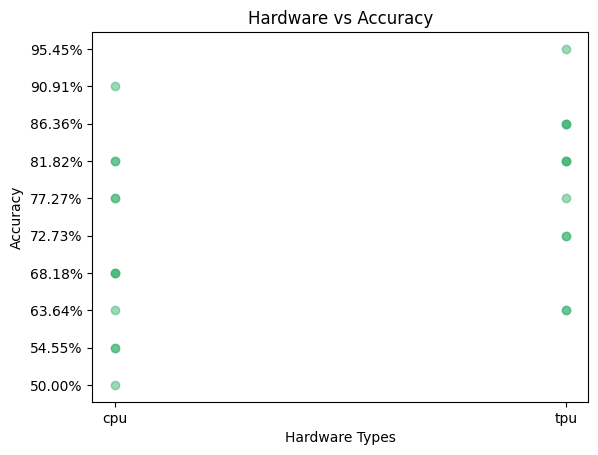

In [ ]:
plt.scatter(hardware_types, accuracies, c='mediumseagreen', alpha=0.5)
plt.xlabel('Hardware Types')
plt.ylabel('Accuracy')
plt.title('Hardware vs Accuracy')
plt.show()

## Scatter plots of the model accuracies vs classifier head designs

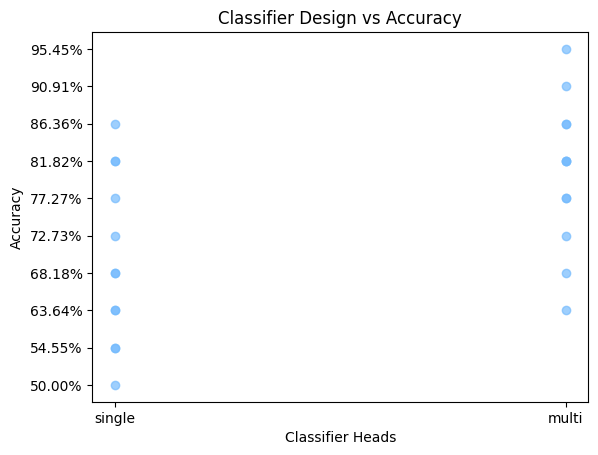

In [ ]:
plt.scatter(classifier_heads, accuracies, c='xkcd:sky blue', alpha=0.7)
plt.xlabel('Classifier Heads')
plt.ylabel('Accuracy')
plt.title('Classifier Design vs Accuracy')
plt.show()

## Scatter plots of the model accuracies vs optimizer algorithms

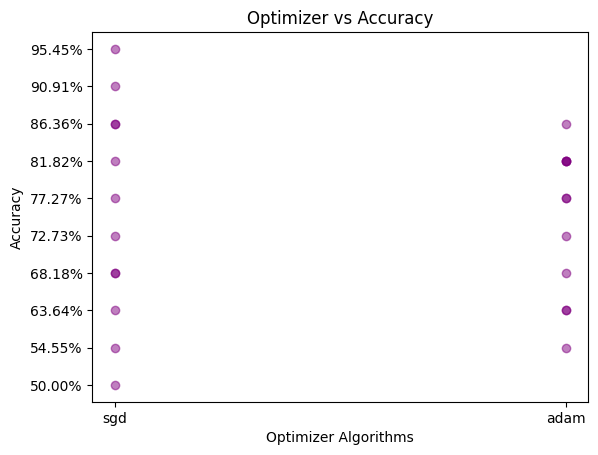

In [ ]:
plt.scatter(opt_algs, accuracies, c='purple', alpha=0.5)
plt.xlabel('Optimizer Algorithms')
plt.ylabel('Accuracy')
plt.title('Optimizer vs Accuracy')
plt.show()

# 4- Bar chart of the model architectures vs training times and inference times

<ipython-input-5-b98867cc840d>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('YlGnBu', 30)


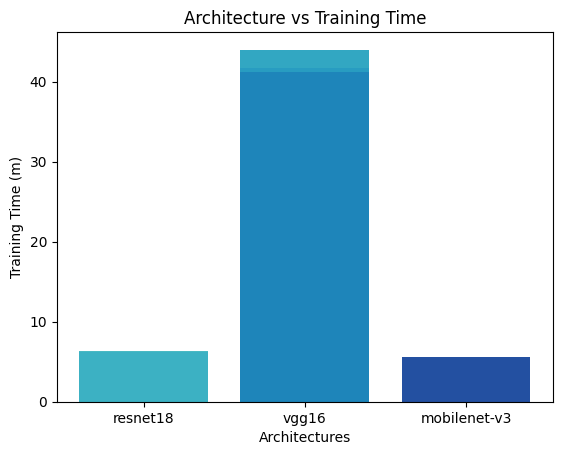

In [5]:
# Read the CSV file into a DataFrame
results_df = pd.read_csv('results.csv')

# Extract relevant columns
architectures = results_df['pretrained_model']
training_times = results_df['training_time_mins']
inference_times = results_df['inference_time_secs']

# Define a colormap
colormap = plt.cm.get_cmap('YlGnBu', 30)

# Create the bar chart with colored bars
plt.bar(architectures, training_times, color=colormap(np.arange(len(architectures))))

plt.xlabel('Architectures')
plt.ylabel('Training Time (m)')
plt.title('Architecture vs Training Time')

# Display the chart
plt.show()

<ipython-input-6-cbbdd5a81a41>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Oranges', 40)


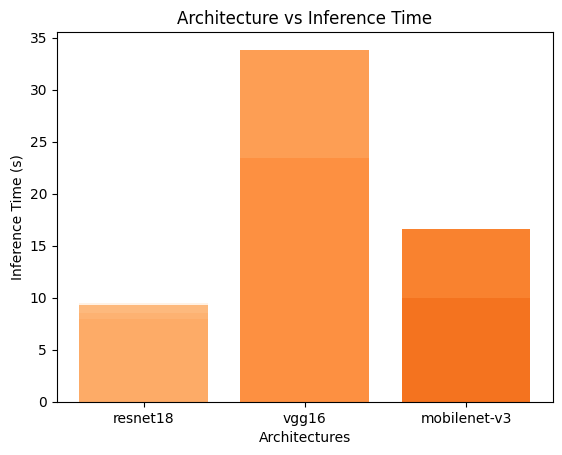

In [6]:
# Define a colormap
colormap = plt.cm.get_cmap('Oranges', 40)

# Create the bar chart with colored bars
plt.bar(architectures, inference_times, color=colormap(np.arange(len(architectures))))

plt.xlabel('Architectures')
plt.ylabel('Inference Time (s)')
plt.title('Architecture vs Inference Time')

# Display the chart
plt.show()